In [1]:
library(tidyverse)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attache Paket: ‘janitor’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    chisq.test, fisher.test




In [2]:
gapdh1_raw <- read.csv("data/GAPDH_1.csv") %>% clean_names()
gapdh2_raw <- read.csv("data/GAPDH_2.csv") %>% clean_names()

glimpse(gapdh1_raw)
glimpse(gapdh2_raw)

Rows: 174
Columns: 3
$ zeit       <int> 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 19…
$ extinktion <chr> "0,020", "0,063", "0,064", "0,065", "0,065", "0,065", "0,06…
$ zugabe     <chr> "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2",…
Rows: 66
Columns: 3
$ zeit       <int> 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 19…
$ extinktion <chr> "0,000", "0,095", "0,121", "0,145", "0,158", "0,173", "0,18…
$ zugabe     <chr> "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0",…


In [3]:
gapdh1_raw <- gapdh1_raw %>%
  mutate(extinktion = as.numeric(gsub(",", ".", extinktion, fixed = TRUE)))

gapdh2_raw <- gapdh2_raw %>%
  mutate(extinktion = as.numeric(gsub(",", ".", extinktion, fixed = TRUE)))

In [4]:
glimpse(gapdh1_raw)
glimpse(gapdh2_raw)

Rows: 174
Columns: 3
$ zeit       <int> 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 19…
$ extinktion <dbl> 0.020, 0.063, 0.064, 0.065, 0.065, 0.065, 0.066, 0.066, 0.0…
$ zugabe     <chr> "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2", "Z2",…
Rows: 66
Columns: 3
$ zeit       <int> 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 19…
$ extinktion <dbl> 0.000, 0.095, 0.121, 0.145, 0.158, 0.173, 0.189, 0.200, 0.2…
$ zugabe     <chr> "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0", "z0",…


# Aufgabe 1

In [5]:
zugabe_events <- gapdh1_raw %>%
  distinct(zugabe, .keep_all = TRUE) %>%
  mutate(label = case_when(
    zugabe== "Z2" ~ "1. Puffer",
    zugabe== "Z3" ~ "2. Puffer",
    zugabe== "Z4" ~ "3. Puffer",
    zugabe== "Z5" ~ "TIM",
    zugabe== "Z6" ~ "Arsenat",
    zugabe == "Z7" ~ "PHMB",
    zugabe == "Z8" ~ "2-ME",
    TRUE ~ as.character(zugabe # Fängt unerwartete Werte ab
    ))
  )

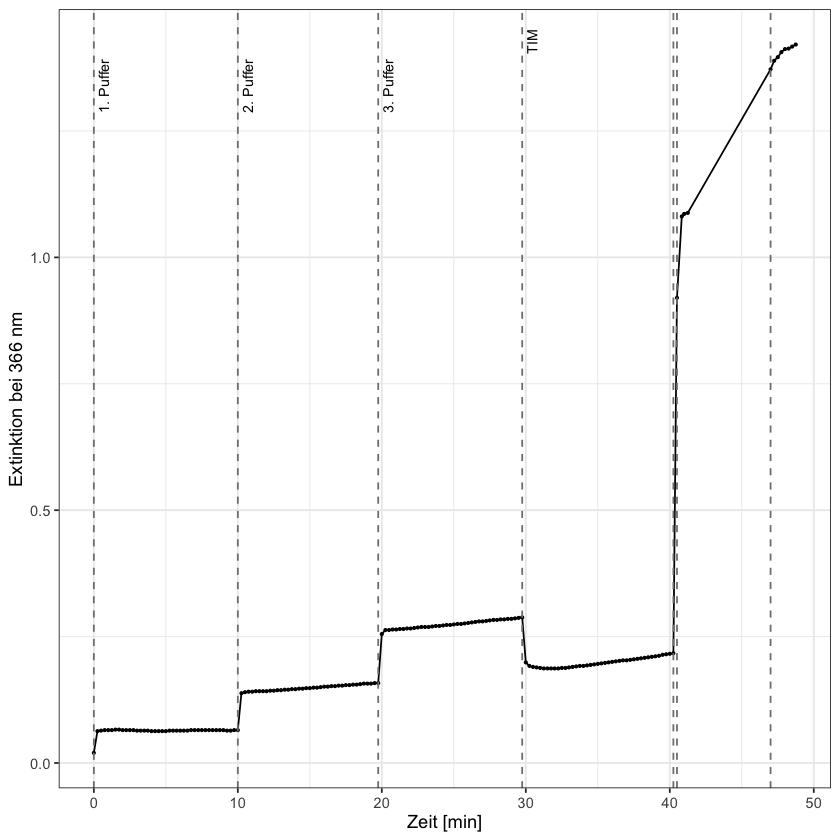

In [6]:
zugabe_labels <- head(zugabe_events, -3)

plot_1 <- ggplot(data = gapdh1_raw, aes(x = zeit/60, y = extinktion)) +
  geom_line() +
  geom_point(size = 0.5) +
  geom_vline(data = zugabe_events, aes(xintercept = zeit/60), linetype = "dashed", color = "grey50") +
  geom_text(
    data = zugabe_labels,
    aes(x = zeit/60, label = label),
    y = 1.5, 
    angle = 90,
    vjust = 1.5,
    hjust = 2,  
    size = 3,
    color = "black"
  ) +
  labs(
    x = "Zeit [min]",
    y = "Extinktion bei 366 nm"
  ) +
  theme_bw()

print(plot_1)


In [8]:
ggsave("figures/erste_kurve.png", plot_1, width = 9, height = 6, dpi = 300)

In [ ]:

# Plateau nach Enzymishcungszugabe
E_0 <- 0.020 

# nach zugabe erster Puffer 
E_2_eq <- 0.065

# nach zugabe zweiter Puffer
E_3_eq <- 0.158
  
# nach zugabe dritter Puffer
E_4_eq <- 0.287

# Berechnung der Extinktionsdifferenzen (Delta E)
delta_E_2 <- E_2_eq - E_0
delta_E_3 <- E_3_eq - E_0
delta_E_4 <- E_4_eq - E_0

E_0
delta_E_2
delta_E_3
delta_E_4

E_0: 0.02 
Delta E nach 1. Pufferzugabe (dE2): 0.045 
Delta E nach 2. Pufferzugabe (dE3): 0.138 
Delta E nach 3. Pufferzugabe (dE4): 0.267 


In [ ]:

V_initial <- 960      # µl
V_enzym_mix <- 10      # µl
V_add_puffer <- 10     # µl

C_p1 <- 100            # mM
C_p2 <- 500            # mM
C_p3 <- 1000           # mM

# Faktor aus Gleichung (12) im Skript (korrekte Formel)
k_factor <- 21e-3

# Physikalische Konstanten
R <- 8.314             # J/(mol*K)
T <- 298.15            # K (25 °C)

V_total_2 <- V_initial + V_enzym_mix + V_add_puffer # 980 µl
Pi_final_2_mM <- (C_p1 * V_add_puffer) / V_total_2

V_total_3 <- V_total_2 + V_add_puffer # 990 µl
Pi_final_3_mM <- ((C_p1 * V_add_puffer) + (C_p2 * V_add_puffer)) / V_total_3

V_total_4 <- V_total_3 + V_add_puffer # 1000 µl
Pi_final_4_mM <- ((C_p1 * V_add_puffer) + (C_p2 * V_add_puffer) + (C_p3 * V_add_puffer)) / V_total_4

Pi_final_2_M <- Pi_final_2_mM / 1000
Pi_final_3_M <- Pi_final_3_mM / 1000
Pi_final_4_M <- Pi_final_4_mM / 1000

K_prime_2 <- k_factor * (delta_E_2^2) / Pi_final_2_M
K_prime_3 <- k_factor * (delta_E_3^2) / Pi_final_3_M
K_prime_4 <- k_factor * (delta_E_4^2) / Pi_final_4_M


K_prime_2
K_prime_3
K_prime_4

K_prime_values <- c(K_prime_2, K_prime_3, K_prime_4)
K_prime_mean <- mean(K_prime_values)
K_prime_sd <- sd(K_prime_values)

cat("\nMittelwert K':", K_prime_mean, "\n")
cat("Standardabweichung K':", K_prime_sd, "\n")

# Formel: Delta_G = -R * T * ln(K')
delta_G_J_mol <- -R * T * log(K_prime_mean)
delta_G_kJ_mol <- delta_G_J_mol / 1000

cat("\nDelta G'°:", delta_G_kJ_mol, "kJ/mol\n")

library(knitr)
results_df <- data.frame(
  Zugabe = c("1. Phosphatpuffer", "2. Phosphatpuffer", "3. Phosphatpuffer"),
  Pi_final_mM = c(Pi_final_2_mM, Pi_final_3_mM, Pi_final_4_mM),
  Delta_E = c(delta_E_2, delta_E_3, delta_E_4),
  K_prime = K_prime_values
)

kable(results_df, digits = 4, caption = "Berechnung der Gleichgewichtskonstante K'")

K' nach 1. Pufferzugabe: 0.0416745 
K' nach 2. Pufferzugabe: 0.06598746 
K' nach 3. Pufferzugabe: 0.09356681 

Mittelwert K': 0.06707626 
Standardabweichung K': 0.02596328 

Delta G'°: 6.697584 kJ/mol




Table: Berechnung der Gleichgewichtskonstante K'

|Zugabe            | Pi_final_mM| Delta_E| K_prime|
|:-----------------|-----------:|-------:|-------:|
|1. Phosphatpuffer |      1.0204|   0.045|  0.0417|
|2. Phosphatpuffer |      6.0606|   0.138|  0.0660|
|3. Phosphatpuffer |     16.0000|   0.267|  0.0936|

# Aufgabe 2

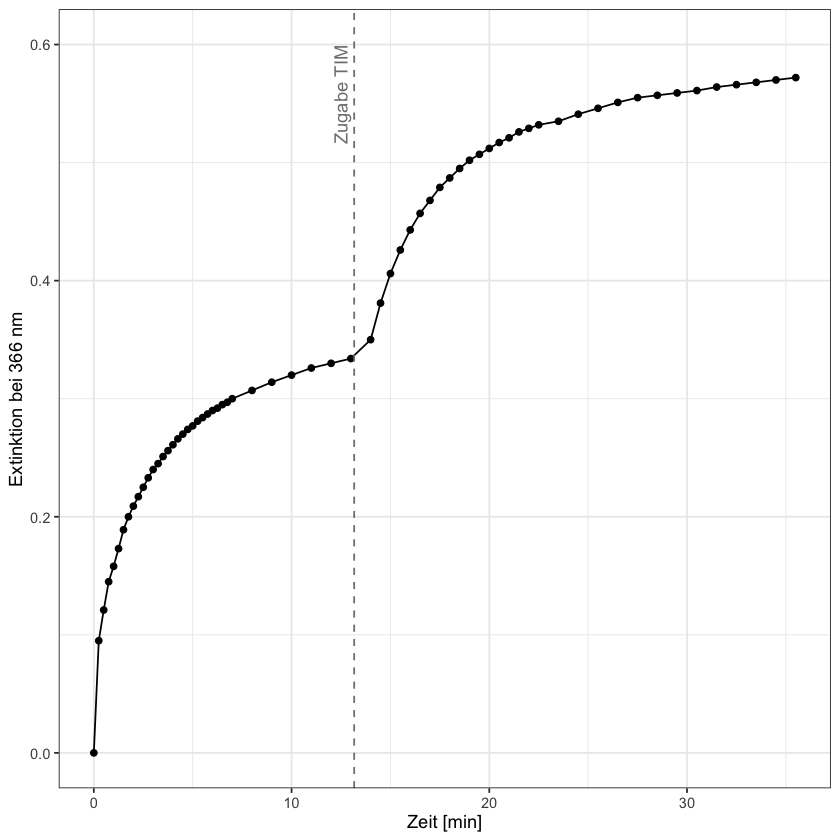

In [ ]:
zeitpunkt_tim_zugabe <- 790/60

plot_2 <- ggplot(data = gapdh2_raw, aes(x = zeit/60, y = extinktion)) +
  geom_line() +
  geom_point() + 
  geom_vline(xintercept = zeitpunkt_tim_zugabe, linetype = "dashed", color = "grey50") +
  annotate("text", x = zeitpunkt_tim_zugabe, y = 0.6, label = "Zugabe TIM", 
           color = "grey50", angle = 90, vjust = -0.5, hjust = 1) +
  labs(
    x = "Zeit [min]",
    y = "Extinktion bei 366 nm"
  ) +
  theme_bw()

print(plot_2)


In [11]:
ggsave("figures/zweite_kurve.png", plot_2, width = 9, height = 6, dpi = 300)

In [ ]:
# Physikalische und experimentelle Konstanten
epsilon_nadh <- 3400  # Molarer Extinktionskoeffizient für NADH bei 366 nm [L * mol^-1 * cm^-1]
d_kuvette    <- 1     # Schichtdicke der Küvette [cm]

# Volumina aus dem Versuchsprotokoll [L]
V_probe        <- 100e-6 # 100 µL FBP-Probelösung
V_gesamt_ansatz<- 1000e-6 # 1000 µL Gesamtvolumen des Ansatzes vor Enzymzugabe
V_enzymmix     <- 10e-6  # 10 µL Enzymmischung
V_tim          <- 2e-6   # 2 µL TIM-Lösung

V_gesamt_final <- V_gesamt_ansatz + V_enzymmix + V_tim


E_final <- last(gapdh2_raw$extinktion)

delta_E_total <- E_final

c_nadh_kuvette <- delta_E_total / (epsilon_nadh * d_kuvette) # [mol/L]

# Konzentration von FBP in der Küvette.
c_fbp_kuvette <- 0.5 * c_nadh_kuvette # [mol/L]

# c_original = c_küvette * (V_gesamt / V_probe)
c_fbp_original <- c_fbp_kuvette * (V_gesamt_final / V_probe) # [mol/L]


# 3.3. Ergebnisse ausgeben
cat("--- Berechnungsergebnisse für Versuch 4.2 ---\n")
cat("Finale Extinktion (E_final):", round(E_final, 3), "\n")
cat("Konzentration von NADH in der Küvette:", format(c_nadh_kuvette * 1000, digits = 3), "mM\n")
cat("Konzentration von FBP in der Küvette:", format(c_fbp_kuvette * 1000, digits = 3), "mM\n")
cat("\n")
cat("--------------------------------------------------\n")
cat("Konzentration der FBP-Probelösung:", format(c_fbp_original * 1000, digits = 4), "mM\n")
cat("--------------------------------------------------\n")

--- Berechnungsergebnisse für Versuch 4.2 ---
Finale Extinktion (E_final): 0.572 
Konzentration von NADH in der Küvette: 0.168 mM
Konzentration von FBP in der Küvette: 0.0841 mM

--------------------------------------------------
Konzentration der FBP-Probelösung: 0.8513 mM
--------------------------------------------------
